<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**

**Import the required libraries**

In [38]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

from sklearn.tree import plot_tree



plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [21]:
df_emp = pd.read_csv("emp_attrition.csv")
df_emp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

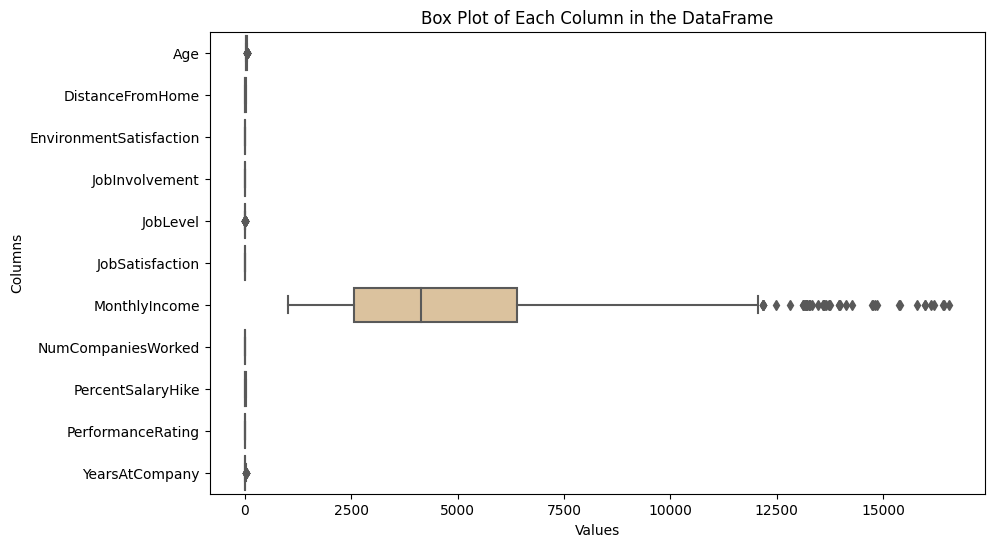

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_emp, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

In [23]:
def remove_outliers(df):
    df_clean = df.copy()
    q1 = df_clean.quantile(0.25)
    q3 = df_clean.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    df_clean = df_clean[~((df_clean < lower_bound) | (df_clean > upper_bound)).any(axis=1)]
    
    return df_clean

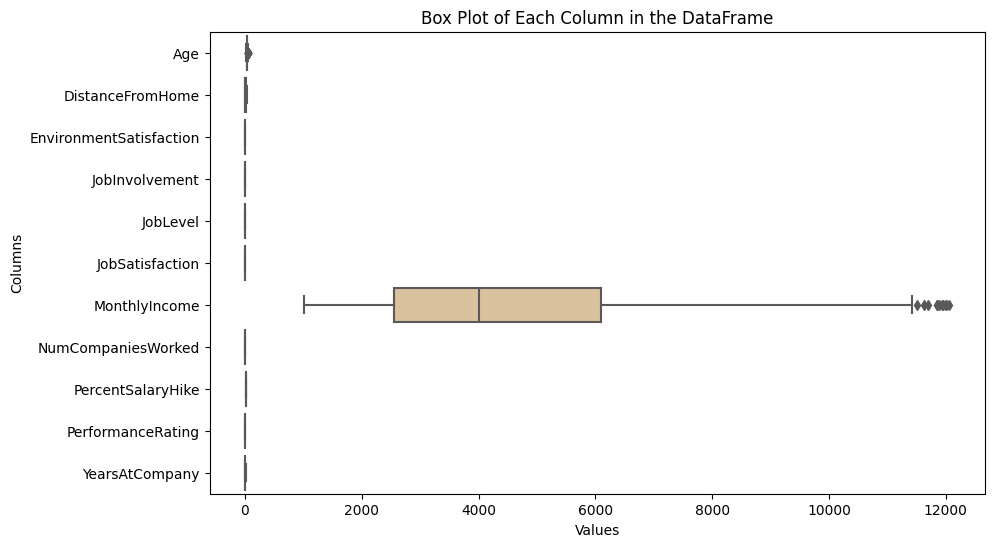

In [24]:
df = remove_outliers(df_emp)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

In [25]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here

df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [27]:
for i in df.select_dtypes(include='object').columns:
    print(i , df[i].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department ['Research & Development' 'Sales' 'Human Resources']
EducationField ['Life Sciences' 'Medical' 'Technical Degree' 'Marketing' 'Other'
 'Human Resources']
Gender ['Male' 'Female']
JobRole ['Research Scientist' 'Sales Executive' 'Laboratory Technician'
 'Manufacturing Director' 'Human Resources' 'Healthcare Representative'
 'Sales Representative' 'Research Director' 'Manager']
OverTime ['Yes' 'No']


In [28]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [29]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,1,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,1,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,0,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [30]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime']

In [31]:
df = pd.get_dummies(data=df,columns=cat_cols,drop_first=True)
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,1,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32,1,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,40,1,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,42,0,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,43,0,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)


def get_train_report(model):
    train_pred = model.predict(X_train)
    return classification_report(y_train,train_pred)

def get_test_report(model):
    test_pred = model.predict(X_test)
    return classification_report(y_test,test_pred)

In [34]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_model = decision_tree_model.fit(X_train,y_train)

In [35]:
print(get_train_report(decision_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       1.00      1.00      1.00       544

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189



In [36]:
print(get_test_report(decision_model))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       170
           1       0.82      0.96      0.88       128

    accuracy                           0.89       298
   macro avg       0.89      0.90      0.89       298
weighted avg       0.90      0.89      0.89       298



In [40]:
y_pred = decision_model.predict(X_test)
print(f"Accuracy of the model = {accuracy_score(y_test,y_pred):.4f}")

Accuracy of the model = 0.8926


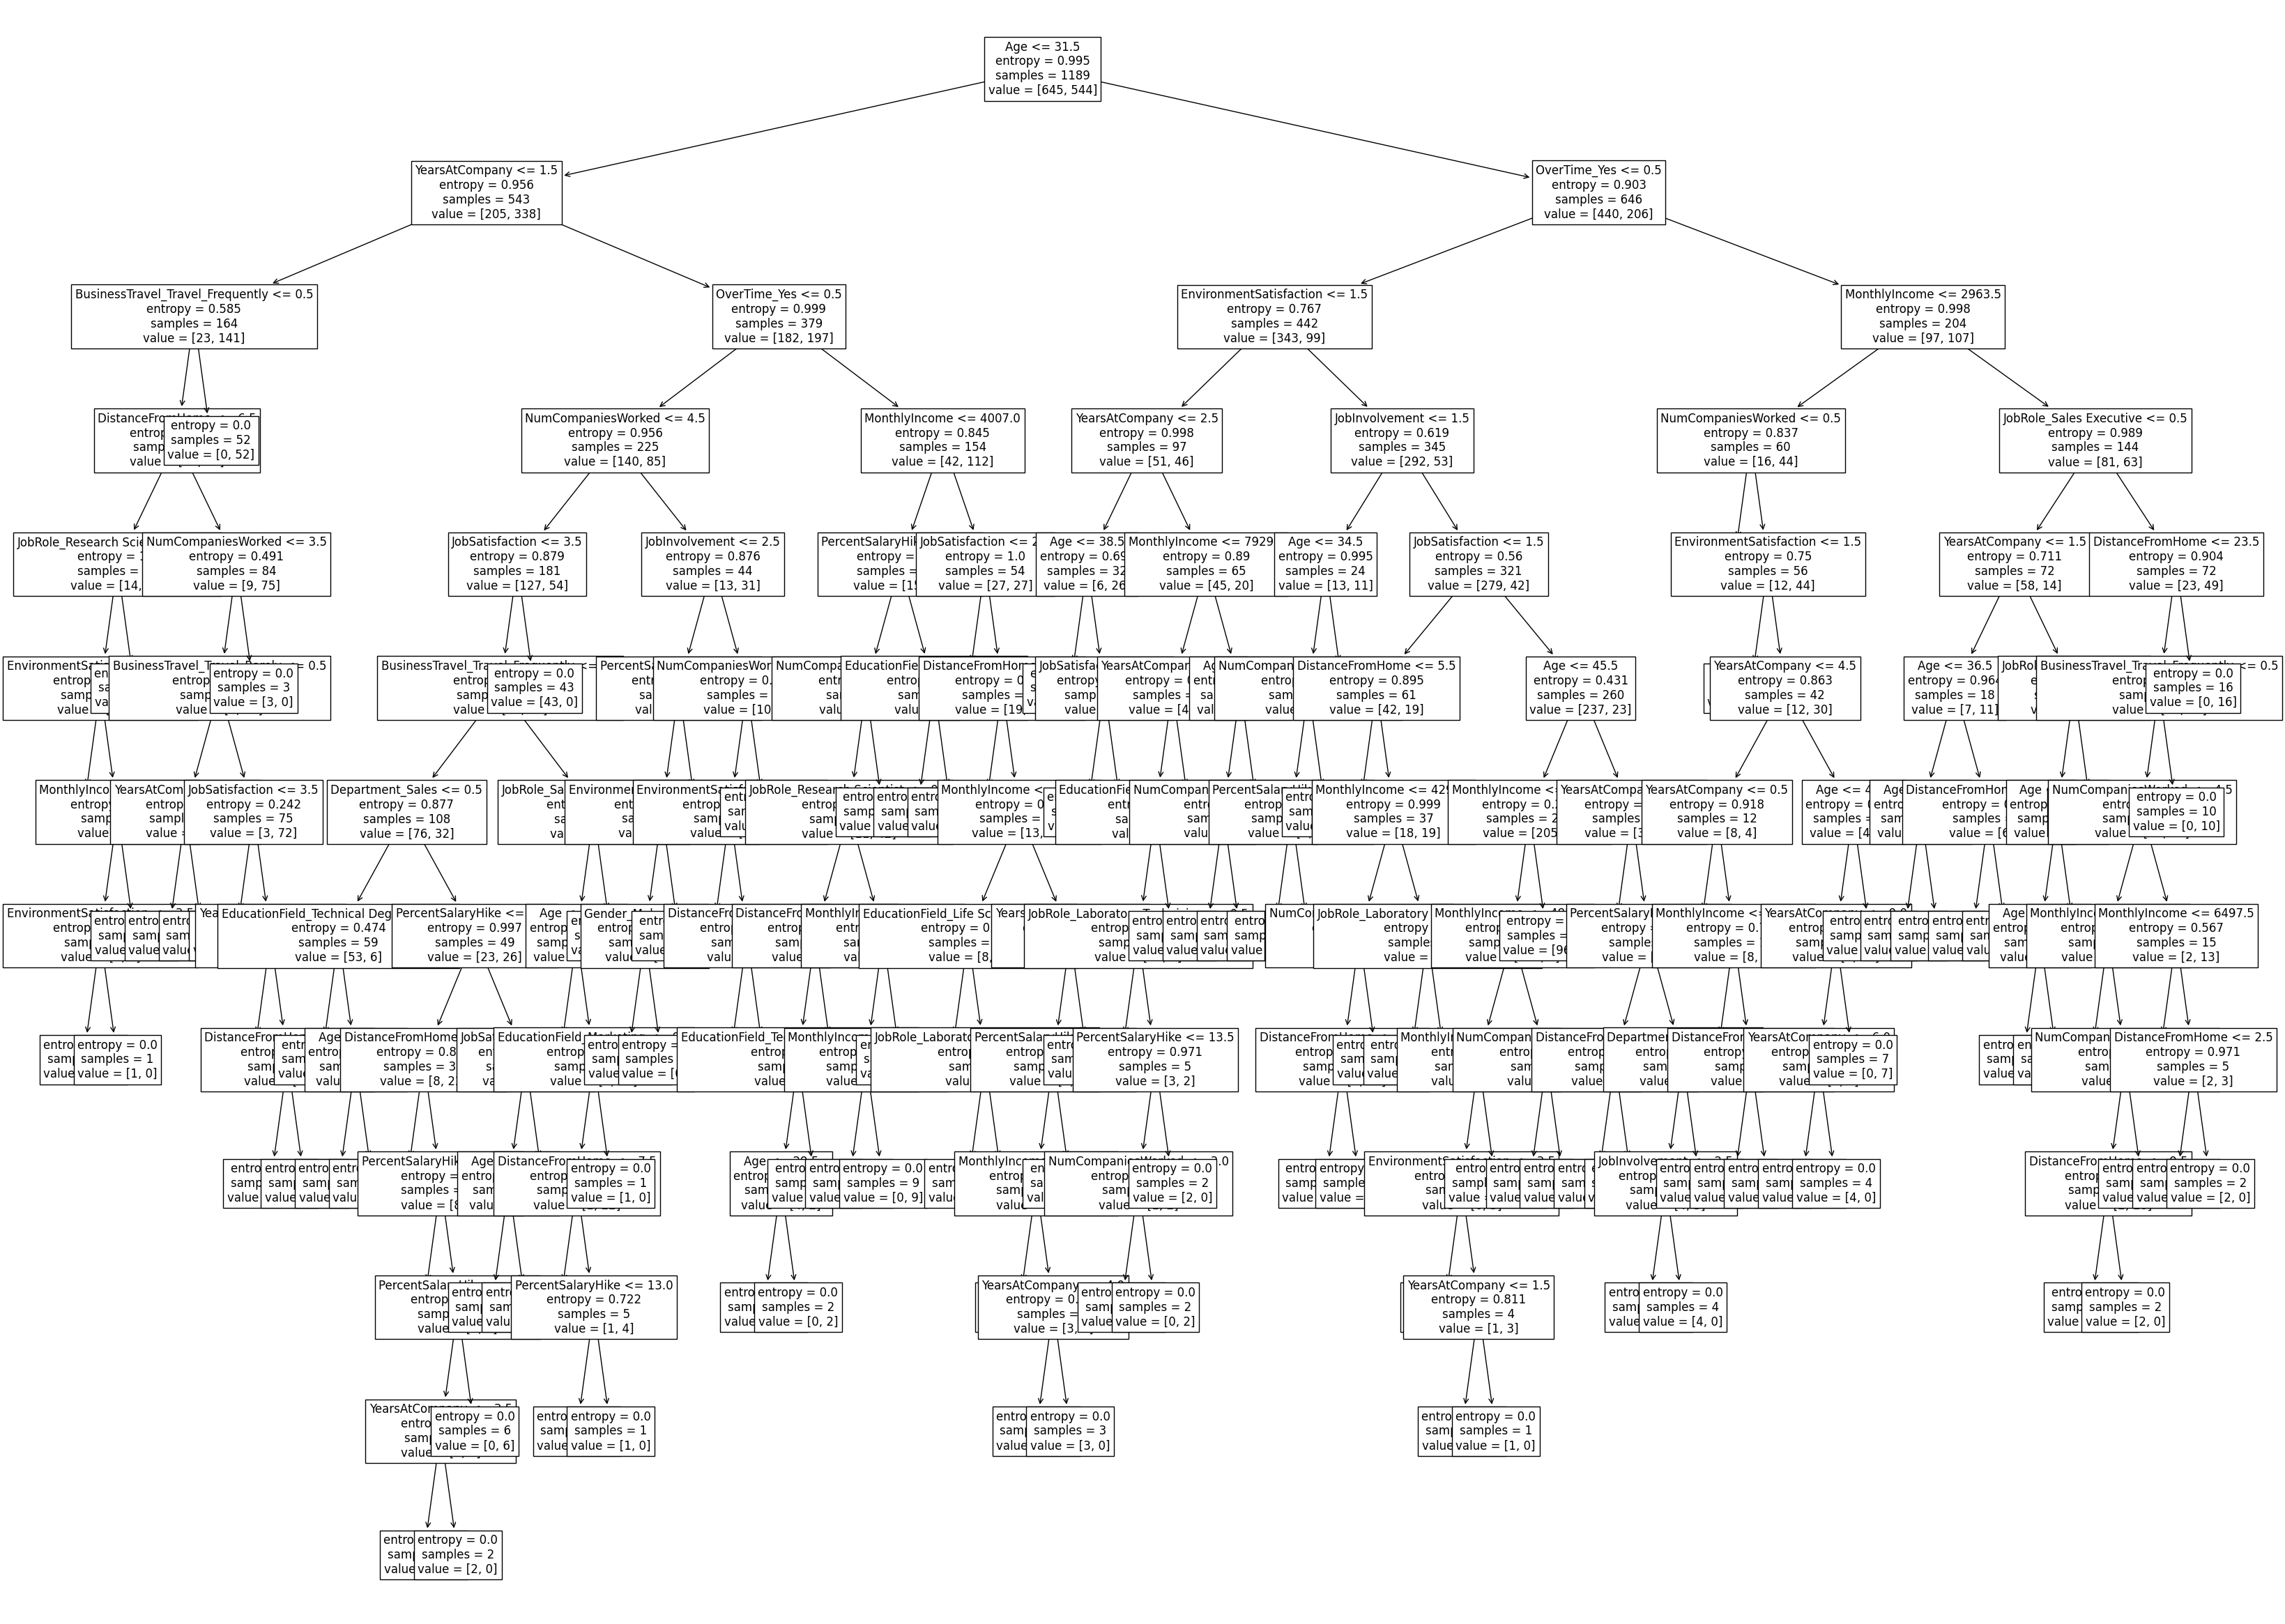

In [37]:
labels = X_train.columns
plt.figure(figsize=(40,30))
tree.plot_tree(decision_model,feature_names=labels,fontsize=12)
plt.show()